# Теорема Байеса

https://habr.com/ru/post/408775/

* **Результаты исследований и испытаний** – это не события. Существует метод диагностики рака, а есть само событие — наличие заболевания. Алгоритм проверяет, содержит ли письмо спам, но событие (на почту действительно пришел спам) нужно рассматривать отдельно от результата его работы.
* **В результатах испытаний бывают ошибки**. Часто наши методы исследований выявляют то, чего нет (ложноположительный результат), и не выявляют то, что есть (ложноотрицательный результат).
* **С помощью испытаний мы получаем вероятности определенного исхода**. Мы слишком часто рассматриваем результаты испытания сами по себе и не учитываем ошибки метода.
* **Ложноположительные результаты искажают картину**. Предположим, что вы пытаетесь выявить какой-то очень редкий феномен (1 случай на 1000000). Даже если ваш метод точен, вероятнее всего, его положительный результат будет на самом деле ложноположительным.
* **Работать удобнее с натуральными числами**. Лучше сказать: 100 из 10000, а не 1%. При таком подходе будет меньше ошибок, особенно при умножении. Допустим, нам нужно дальше работать с этим 1%. Рассуждения в процентах неуклюжи: «в 80% случаев из 100% получили положительный исход». Гораздо легче информация воспринимается так: «в 80 случаях из 100 наблюдали положительный исход».

**Даже в науке любой факт** — это всего лишь результат применения какого-либо метода. С философской точки зрения научный эксперимент – это всего лишь испытание с вероятной ошибкой. Есть метод, выявляющий химическое вещество или какой-нибудь феномен, и есть само событие — присутствие этого феномена. Наши методы испытаний могут дать ложный результат, а любое оборудование обладает присущей ему ошибкой.

Характерный пример: скорость нейтрино > скорости света (2011 год). Правда, там речь шла о систематической, а не статистической ошибке. https://www.interfax.ru/russia/209185

Формула Байеса выглядит так:
$$Pr(A|X) = \frac{Pr(X|A)Pr(A)}{Pr(X)}$$

где
$Pr(X)$ – это константа нормализации. Вероятность наступления события $X$
$Pr(X|A)$ – это вероятность наступления $X$ при условии, что наступило событие $A$

### Интересная интерпретация теоремы Байеса

Простое объяснение в двух строках: представьте что вы встретили в портовом городе человека в очках: что более вероятно, что он библиотекарь или что он моряк?

Правильный ответ, что моряк, так как моряков гораздо больше в городе, и малая доля их, носящая очки, перевешивает большую долю библиотекарей.

# Доверительные интервалы (Confidence intervals)

Термин, используемый в математической статистике при интервальной оценке статистических параметров, более предпочтительной при небольшом объёме выборки, чем точечная. Доверительным называют интервал, который покрывает неизвестный параметр с заданной надёжностью.

Не совсем строгое толкование доверительного интервала с уровнем доверия, скажем, 95% состоит в следующем. Если провести очень большое количество независимых экспериментов с аналогичным построением доверительного интервала, то в 95% экспериментов доверительный интервал будет содержать оцениваемый параметр $\theta$  (то есть будет выполняться $L\leqslant \theta \leqslant U$), а в оставшихся 5% экспериментов доверительный интервал не будет содержать $\theta$ .

Утверждение. Случайная величина

$T={\frac {{\bar {X}}-\mu }{S/{\sqrt {n}}}}$

имеет распределение Стьюдента с $n-1$ степенями свободы $\mathrm {t} (n-1)$, где $S$ — несмещённое выборочное стандартное отклонение.

### Распределение Стьюдента

Близко к нормальному при стремлении кол-ва наблюдений в выборке к бесконечности. На самом деле можно считать его нормальным уже даже при $n > 50$

Тогда в силу симметрии распределения стьюдента имеем:

$\mathbb {P} \left(-t_{1-{\frac {\alpha }{2}},n-1}\leq T\leq t_{1-{\frac {\alpha }{2}},n-1}\right)=1-\alpha$.

После подстановки выражения для $T$ и несложных алгебраических преобразований получаем:

$\mathbb {P} \left({\bar {X}}-t_{1-{\frac {\alpha }{2}},n-1}{\frac {S}{\sqrt {n}}}\leq \mu \leq {\bar {X}}+t_{1-{\frac {\alpha }{2}},n-1}{\frac {S}{\sqrt {n}}}\right)=1-\alpha$ .

$t_{\alpha ,n-1}$ — $\alpha$ - квантили распределения Стьюдента (или, в нашем случае, квантили нормального распределения)

In [ ]:
!pip install scipy

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sample_norm = stats.norm(0, 1).rvs(size=100)

print(np.quantile(sample_norm, 0.025)) # 2.5% перцентиль
print(np.quantile(sample_norm, 0.975)) # 97.5% перцентиль

-1.4722673850702135
1.6155699306829778


Получается значение, примерно равное 1.96. На самом деле, при стремлении size к бесконечности, значение квантили 0.975 будет стремиться к 1.96

Теперь рассчитаем доверительный интервал для выборочного среднего по формуле выше.

In [ ]:
(1 + 0.95) / 2

0.975

<ipython-input-6-53656e3cc21f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_norm)


<Axes: ylabel='Density'>

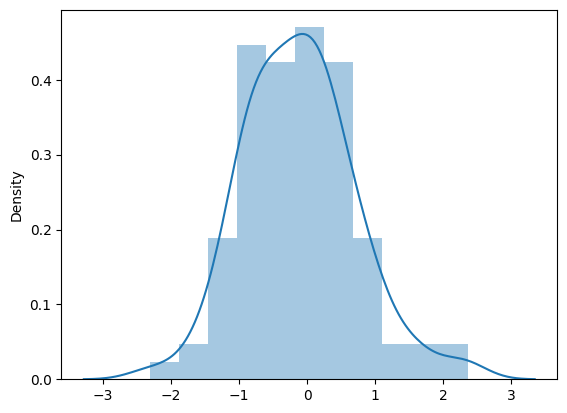

In [6]:
sns.distplot(sample_norm)

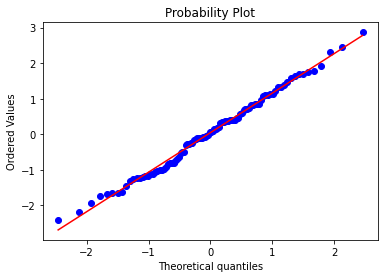

In [ ]:

res = stats.probplot(sample_norm, plot=plt)

In [7]:
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, s = np.mean(a), np.std(a)
    h = s * stats.t.ppf((1 + confidence) / 2, n - 1) / np.sqrt(n)
    return m-h, m, m+h

In [8]:
mean_confidence_interval(sample_norm)

(-0.27988782016606867, -0.11822647262155483, 0.043434874922959)

In [10]:
sample_norm_2 = stats.norm(1, 5).rvs(size=100_000)

print(mean_confidence_interval(sample_norm_2,
                               confidence=0.99))

print(np.quantile(sample_norm_2, 0.1)) # 2.5% перцентиль
print(np.quantile(sample_norm_2, 0.9)) # 97.5% перцентиль

(0.9449469468751134, 0.985627475915336, 1.0263080049555584)
-5.404848473909041
7.390504245258764


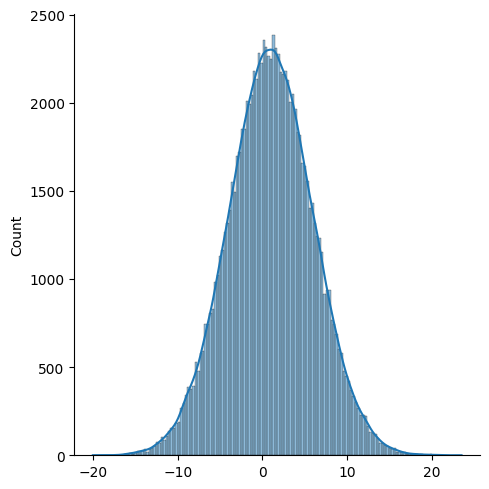

In [11]:
sns.displot(sample_norm_2, kde=True)

In [12]:
np.std(sample_norm_2) * stats.t.ppf((1 + 0.9) / 2, len(sample_norm_2) - 1) / np.sqrt(len(sample_norm_2))

0.025977209870871574

# Проверка Гипотез

### Равенство средних

**Статистическая гипотеза** — предположение о виде распределения и свойствах случайной величины, которое можно подтвердить или опровергнуть применением статистических методов к данным выборки

Например, мы увидели, что среднее количество звонков в сервисный центр меньше 1-цы. Мы хотим понять, отличается ли значимо среднее кол-во звонков от 0, или можно смело закрывать сервисный центр и не тратить деньги на статистическую погрешность :) Иными словами, мы хотим понять, являются ли звонки от некоторых пользователей "статистической погрешностью", ради которой не стоит содержать целый штат сотрудников в сервис-центре.

### Этапы проверки гипотезы

1. Формулировка основной гипотезы $H_{0}$ и конкурирующей гипотезы $H_1$ (в нашем случае H0 - это среднее количество звонков значимо не отличимо от 0, т.е. в сервисный центр пользователи не звонят, H1 - альтернативная гипотеза, означающая, что среднее количество звонков от 0 значимо отличимо).
2. Задание уровня значимости $\alpha$ , на котором в дальнейшем и будет сделан вывод о справедливости гипотезы. Он равен вероятности допустить ошибку первого рода (Например, мы полагаем, что нас устроит вероятность допустить ошибку на уровне 1%, значит $\alpha == 0.01$)
3. Расчёт статистики $\phi$  критерия такой, что: её величина зависит от исходной выборки ${\mathbf  {X}}=(X_{1},\ldots ,X_{n}):\;\phi =\phi (X_{1},\ldots ,X_{n})$; по её значению можно делать выводы об истинности гипотезы $H_{0}$; статистика $\phi$ , как функция случайной величины $\mathbf {X}$ , также является случайной величиной и подчиняется какому-то закону распределения. (Мы будем пользоваться критерием Стьюдента для проверки гипотезы)
4. Построение критической области. Из области значений $\phi$  выделяется подмножество $\mathbb {C}$  таких значений, по которым можно судить о существенных расхождениях с предположением. Его размер выбирается таким образом, чтобы выполнялось равенство $P(\phi \in {\mathbb  {C}})=\alpha$ . Это множество $\mathbb {C}$  и называется критической областью. (Смысл в том, что "выбросы" бывают односторонние и двусторонние. В нашем случае, проверка будет односторонней, потому что среднее может быть отличимо от 0 только в большую сторону)
5. Вывод об истинности гипотезы. Наблюдаемые значения выборки подставляются в статистику $\phi$  и по попаданию (или непопаданию) в критическую область $\mathbb {C}$  выносится решение об отвержении (или принятии) выдвинутой гипотезы $H_{0}$.

### Виды критической области

* Двусторонняя критическая область определяется двумя интервалами $(-\infty ,\;x_{{\alpha /2}})\cup (x_{{1-\alpha /2}}\;+\infty )$
* Левосторонняя критическая область определяется интервалом $(-\infty ,\;x_{\alpha })$
* Правосторонняя критическая область определяется интервалом $(x_{{1-\alpha }},\;+\infty )$

В нашем случае **критическая область правосторонняя**

#### Для проверки гипотезы мы будем использовать критерий стьюдента. Так называемую t-статистику.

Статистика рассчитывается всё по той же формуле:
$$t={\frac  {\overline X-m}{s_{X}/{\sqrt  {n}}}}$$

p-value - вероятность допустить ошибку первого рода (т.е. отвергнуть H0, когда на самом деле она верна). Рассчитывается p-value как

Использовать её можно только в случае, когда распределение случайной величины - нормальное. Давайте посмотрим на распределение звонков в сервис-центр

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('telecom_churn.csv')

In [16]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


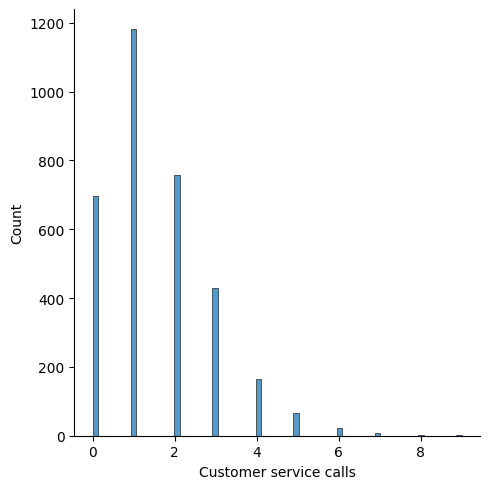

In [17]:
sns.displot(df['Customer service calls'], kde=False)

## Центральная предельная теорема

In [20]:
service_calls = np.array(df['Customer service calls'])

In [21]:
service_calls.shape

(3333,)

In [22]:
service_calls_means = []
for i in range(100_000):
    service_calls_subset = np.random.choice(service_calls, size=100)
    service_calls_means.append(np.mean(service_calls_subset))

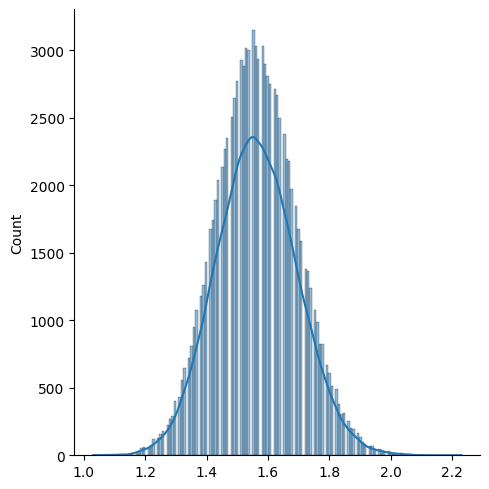

In [23]:
sns.displot(service_calls_means, kde=True)

1. Формулируем гипотезу
2. Выбираем порог значимости (0.01)
3. Применяем критерий
4. Определяем критическую область
5. Решаем, стоит ли отвергать 0-ю гипотезу

#### Гипотеза:
H0 - среднее кол-во звонков неотличимо от 0. Н1 - среднее значение статистически отлично от 0.

#### Выбираем порог значимости:
Подходим к этому осознанно, учитывая размерность выборки. В нашем случае выборка размером 1000. Можем взять $\alpha=0.001$

#### Применяем критерий стьюдента:

In [24]:
N = len(service_calls_means)
t = (np.mean(service_calls_means) - 0)/(np.std(service_calls_means)*np.sqrt(1./N))
p = 1. - stats.t.cdf(t,df=2*1000-2)
print(t, p)

3755.8398728246902 0.0


In [ ]:
stats.ttest_1samp(service_calls_means, 0)

Ttest_1sampResult(statistic=3746.1099333047086, pvalue=0.0)

In [ ]:
# stats.ttest_1samp(service_calls, 0)

stats.ttest_ind(first_group,second_group)

#### Строим критическую область

У нас правостронний тест, поэтому необходимо сравнивать p-value со значением $\alpha$.

#### Делаем выводы

$p_{value} << \alpha$, следовательно отвергаем нулевую гипотезу в пользу H1.

Вывод: среднее кол-во звонков значимо отличимо от 0, а, значит, сервис-центр нам все-таки нужен.

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
# sns.heatmap(df.corr())

In [ ]:
churn_prob

0.14491449144914492

In [ ]:
churn_prob_of_n_count_calls = df[df['Churn']==\
                                 True]['Customer service calls']\
                            .value_counts(normalize=True)[3]

calls_n_prob = df['Customer service calls']\
                    .value_counts(normalize=True)[3]
print(churn_prob_of_n_count_calls, calls_n_prob)
print(3,churn_prob_of_n_count_calls*1.*churn_prob/calls_n_prob)

0.09109730848861283 0.12871287128712872
3 0.10256410256410256


In [ ]:
churn_prob = df['Churn'].value_counts(normalize=True)[True]

for num_calls in sorted(df['Customer service calls'].unique()):
    churn_prob_of_n_count_calls = df[df['Churn']==\
                                     True]['Customer service calls']\
                                .value_counts(normalize=True)[num_calls]

    calls_n_prob = df['Customer service calls']\
                        .value_counts(normalize=True)[num_calls]
#     print(churn_prob_of_n_count_calls, calls_n_prob)
    print(num_calls,churn_prob_of_n_count_calls*1.*churn_prob/calls_n_prob)

0 0.1319942611190818
1 0.10330228619813718
2 0.11462450592885376
3 0.10256410256410256
4 0.4578313253012048
5 0.6060606060606061
6 0.6363636363636364
7 0.5555555555555556
8 0.5
9 1.0


# Задание 1
# Проверить критерием Стьюдента H0 о равенстве средних двух подвыборок
1) Total day minutes для churn=1

2) Total day minutes для churn=0

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
df['total_min'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']

<ipython-input-27-4f5a6368bc2e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total day minutes'])
<ipython-input-27-4f5a6368bc2e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total eve minutes'])
<ipython-input-27-4f5a6368bc2e>:4: UserWarning: 

`distplot` is a deprecated functio

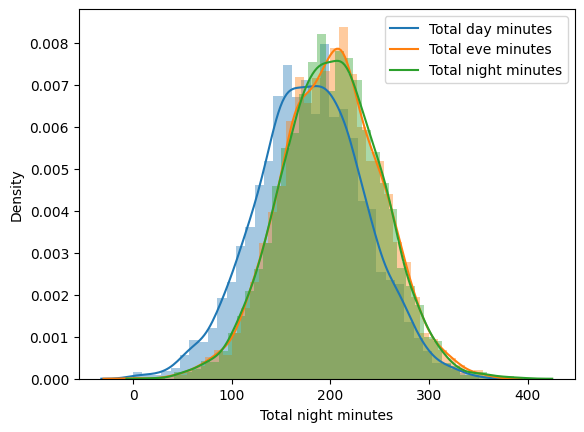

In [27]:
# sns.distplot(df['total_min'])
sns.distplot(df['Total day minutes'])
sns.distplot(df['Total eve minutes'])
sns.distplot(df['Total night minutes'])
plt.legend([
#     'total_min',
    'Total day minutes','Total eve minutes','Total night minutes'])

In [28]:
loyal = df[df['Churn']==0]['total_min']
not_loyal = df[df['Churn']==1]['total_min']

<ipython-input-29-23c08ec7493c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loyal)
<ipython-input-29-23c08ec7493c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_loyal)


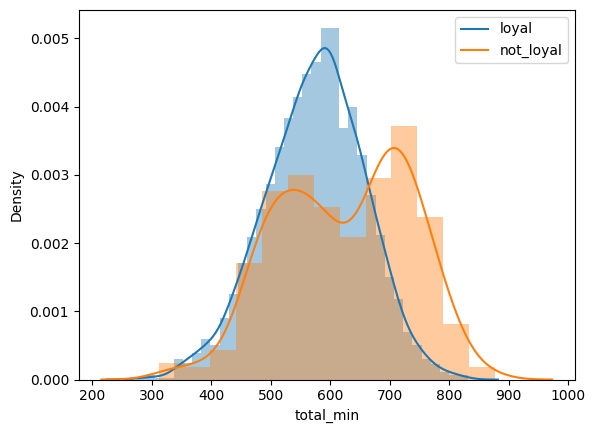

In [29]:
sns.distplot(loyal)
sns.distplot(not_loyal)
plt.legend(['loyal','not_loyal'])

<Axes: xlabel='Churn', ylabel='total_min'>

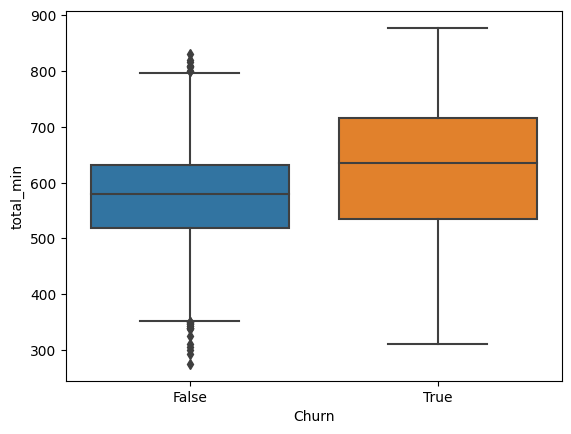

In [30]:
sns.boxplot(data = df, y ='total_min', x = 'Churn' )


In [31]:
stats.ttest_ind(not_loyal,loyal)

TtestResult(statistic=11.563807911149468, pvalue=2.3690787585890774e-30, df=3331.0)

 # A/B тестирование

<img src="https://habrastorage.org/files/ebc/d2e/a7d/ebcd2ea7d90e4a13bd39ae9a3bb80200.jpg" />

A/B тестирование — это мощный маркетинговый инструмент для повышения эффективности работы вашего интернет-ресурса. С помощью A/B тестов повышают конверсию посадочных страниц, подбирают оптимальные заголовки объявлений в рекламных сетях, улучшают качество поиска.

https://habr.com/ru/post/233911/

<ipython-input-32-f4b213535e8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.norm(0, 2).rvs(size=1000))


<Axes: ylabel='Density'>

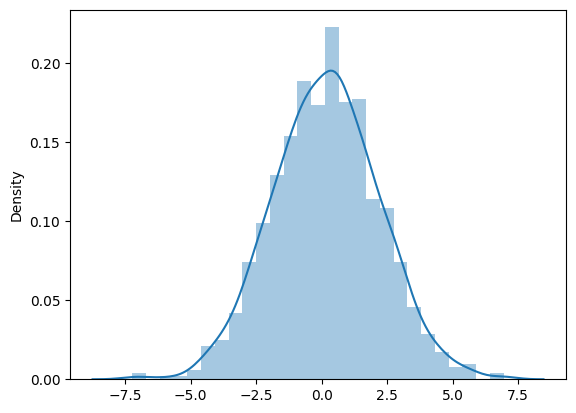

In [32]:
sns.distplot(stats.norm(0, 2).rvs(size=1000))

### 2samp ttest

<img src="https://habrastorage.org/files/cf9/9a6/53c/cf99a653c5634fdeb545992a6cd00b16.png" />

<img src="https://habrastorage.org/files/9b9/164/679/9b91646797da42879275c01c7d6d341e.png" />

### Метрика

В первую очередь, для A/B теста необходимо выбрать метрику, средние значения которой будут сравниваться в контексте прикладной задачи.

Например, мы изменили рекламный баннер и хотим понять, приведет ли это изменение к увеличению кол-ва кликов.

Метрика в данном случае - наличие клика на баннере (1 или 0).

### Данные

Для сбора данных необходимо провести онлайн эксперимент на какой-то группе пользователей.

Как правило, формируют 2 группы одинакового размера (по 1% пользователей, например). Одна - экспериментальная, вторая - контрольная. Первые видят новый баннер, вторые, как и все остальные пользователи - старый баннер.

In [34]:
clicks_new = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

clicks_old = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
len(clicks_new)

30

In [ ]:
print(np.mean(clicks_new))

print(np.mean(clicks_old))

0.26666666666666666
0.23333333333333334


In [ ]:
1-10.266666666666666/10.23333333333333334

-0.0032573289902280145

#### Оказалось, что на новый баннер кликали все же больше, чем на старый. Теперь проверим значимость этого отличия, чтобы не сделать поспешных выводов

### Проверка гипотезы на равенство средниего кол-ва кликов.

#### Гипотеза
Н0: Среднее значение кол-ва кликов одинаково для обеих групп.

#### Выбор порога значимости
Наблюдений не так много, поэтому примем, что $\alpha = 0.05$

#### Выбор критерия
Используем тест стьюдента. Используем ЦПТ, т.к. изначальное распределение не нормально.

#### Критическая область
У нас двусторонний тест. Т.к. новый баннер может быть даже значимо хуже предыдущего.

<ipython-input-35-4abea203f890>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clicks_new, kde=False)
<ipython-input-35-4abea203f890>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clicks_old,kde=False)


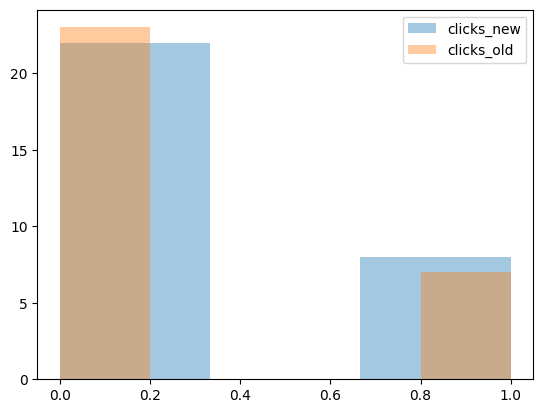

In [35]:
sns.distplot(clicks_new, kde=False)
sns.distplot(clicks_old,kde=False)
plt.legend(['clicks_new','clicks_old'])

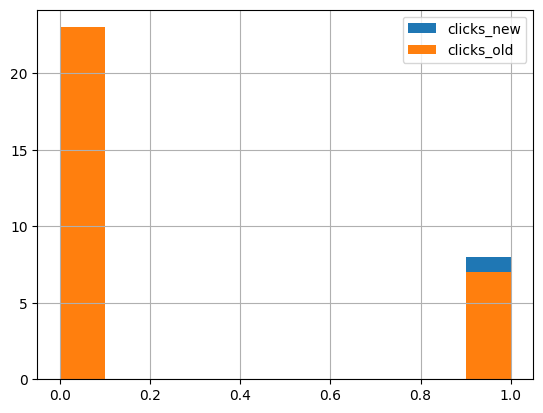

In [36]:
pd.Series(clicks_new).hist()
pd.Series(clicks_old).hist()
plt.legend(['clicks_new','clicks_old'])

In [37]:
def get_cl_samp(clicks, size=10, iters=10):
    arr = []
    for i in range(iters):
        samp = np.random.choice(clicks, size=size)
        arr.append(np.mean(samp))
    return arr

In [38]:
cl_new_mean = get_cl_samp(clicks_new,
                          size=10, iters=10)
cl_old_mean = get_cl_samp(clicks_old,
                          size=10, iters=10)

<ipython-input-39-e6deca766731>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cl_new_mean, kde=True)
<ipython-input-39-e6deca766731>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cl_old_mean, kde=True)


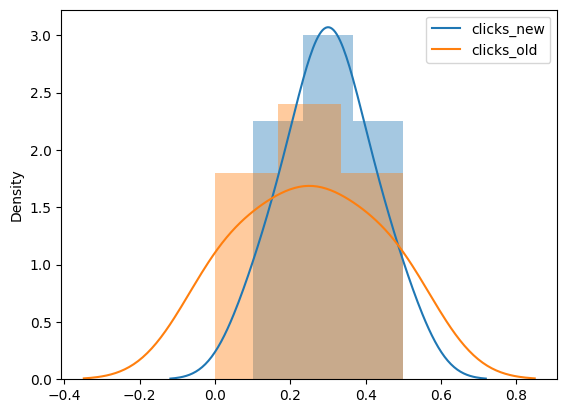

In [39]:
sns.distplot(cl_new_mean, kde=True)
sns.distplot(cl_old_mean, kde=True)
plt.legend(['clicks_new','clicks_old'])

In [40]:
stats.ttest_ind(cl_new_mean, cl_old_mean)

TtestResult(statistic=0.7276068751089978, pvalue=0.47621287070463303, df=18.0)

### Выводы

$T_{statistic} > 0$, значит новый баннер все же чуть лучше старого.

$p_{value} >> \alpha$, значит мы не отвергаем Н0. Следовательно, новый баннер не лучше старого с точки зрения выбранной метрики

## Важность А/А тестирования

Почему у нас могут быть причины не доверять стат. тесту? Дело в том, что статистический тест предполагает вероятностную интерпретацию измеряемых величин. Например, мы считаем, что у каждого пользователя есть «вероятность» совершить некое успешное действие (успешными действиями могут быть регистрация, покупка товара, лайк и т. д.). При этом мы считаем действия разных пользователей независимыми. Но изначально мы не знаем, насколько хорошо действия пользователей соответствуют вероятностной модели стат. теста.

Чтобы оценить качество системы A/B-тестирования, мы проводили большое количество A/A-тестов и измеряли процент прокрасившихся тестов, то есть процент случаев, в которых стат. тест ошибался, утверждая о статистически значимом превосходстве одного варианта над другим. О пользе A/A-тестов можно прочитать, например, здесь. Измеренный процент ошибок стат. теста сравнивался с заданным теоретическим значением: если они примерно совпадали, значит, все хорошо; если измеренный процент ошибок сильно меньше или сильно больше теоретического, значит, результаты такого стат. теста ненадежны.


https://habr.com/ru/post/233911/  
https://habr.com/ru/company/hh/blog/321386/

# Задание 2
# Проверить критерием Стьюдента H0 о равенстве средних двух подвыборок
1) Customer service calls(или на выбор) для churn=1

2) Customer service calls(или на выбор) для churn=0

In [41]:
samle_churn = df[df['Churn']==1]\
            ['Customer service calls']
samle_non_churn = df[df['Churn']==0]\
            ['Customer service calls']\
            .sample(samle_churn.shape[0])

<ipython-input-42-885c7a835b80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Customer service calls'])
<ipython-input-42-885c7a835b80>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samle_churn, kde=True)
<ipython-input-42-885c7a835b80>:3: UserWarning: 

`distplot` is a deprecated func

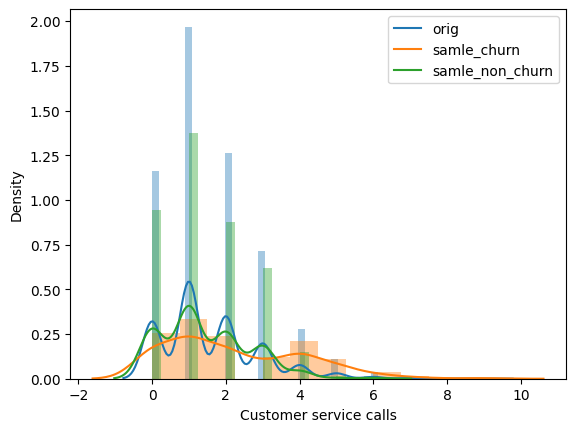

In [42]:
sns.distplot(df['Customer service calls'])
sns.distplot(samle_churn, kde=True)
sns.distplot(samle_non_churn, kde=True)
plt.legend(['orig','samle_churn','samle_non_churn'])

In [43]:
orig_cpt = get_cl_samp(df['Customer service calls'],
                          size=100, iters=100)
samle_churn_cpt = get_cl_samp(samle_churn,
                          size=100, iters=100)
samle_non_churn_cpt = get_cl_samp(samle_non_churn,
                          size=100, iters=100)

<ipython-input-44-beb988c10590>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samle_churn_cpt, kde=True)
<ipython-input-44-beb988c10590>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samle_non_churn_cpt, kde=True)


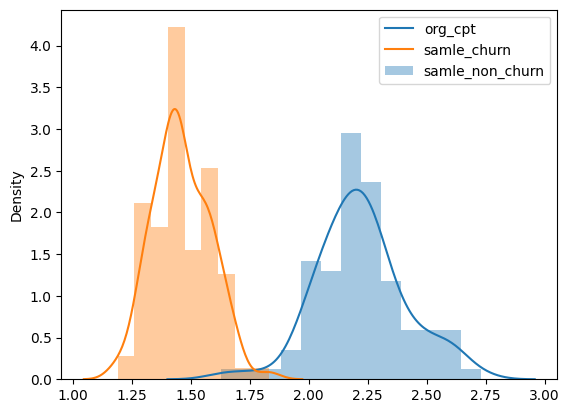

In [44]:
# sns.distplot(orig_cpt)
sns.distplot(samle_churn_cpt, kde=True)
sns.distplot(samle_non_churn_cpt, kde=True)
plt.legend(['org_cpt','samle_churn','samle_non_churn'])

In [45]:
stats.ttest_ind(samle_churn_cpt, samle_non_churn_cpt)

TtestResult(statistic=33.658758659066194, pvalue=7.357410417172655e-84, df=198.0)